In [4]:
!pip install matplotlib

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("IndiaVsPakistan_clean.csv")
df.head()

,match_id,year,venue,tournament,india_runs,pak_runs,toss_winner,bat_first,india_wickets,pak_wickets,winner,pitch_condition,total_runs,india_margin,winner_is_india
0,1,2021,New York,WorldCup,166,184,Pakistan,Pakistan,2,7,Pakistan,Batting-friendly,350,-18,0
1,2,2010,New York,AsiaCup,179,156,Pakistan,Pakistan,6,7,India,Bowler-friendly,335,23,1
2,3,2020,Lahore,AsiaCup,126,146,Pakistan,Pakistan,2,5,Pakistan,Bowler-friendly,272,-20,0
3,4,2010,New York,AsiaCup,181,104,Pakistan,Pakistan,3,4,India,Balanced,285,77,1
4,5,2012,Kolkata,AsiaCup,170,182,Pakistan,India,3,10,Pakistan,Balanced,352,-12,0


In [31]:
print("Total matches:", len(df))
print("\nMatches per tournament:\n",df['tournament'].value_counts())
print("\nMatches per venue:\n",df['venue'].value_counts().head(10))

Total matches: 1001

Matches per tournament:
 tournament
AsiaCup      346
WorldCup     337
Bilateral    318
Name: count, dtype: int64

Matches per venue:
 venue
Dubai        116
Durban       111
Karachi      104
Melbourne    104
Colombo      101
Delhi         99
New York      95
Kolkata       95
Lahore        94
Dhaka         82
Name: count, dtype: int64


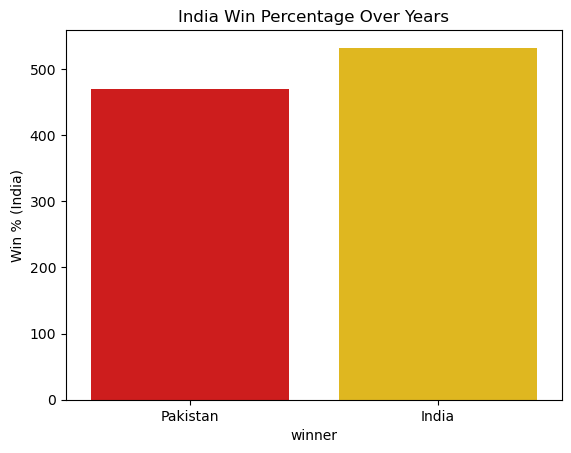

In [77]:
#India vs Pakistan Win Count
sns.countplot(x='winner',data=df,hue='winner',palette='hot')
plt.title("India vs Pakistan Wins")
plt.show()

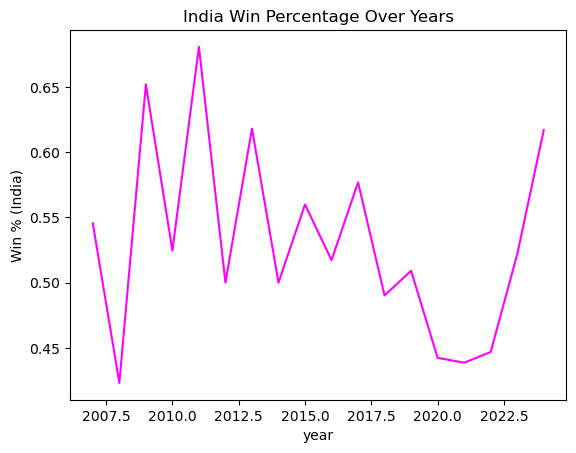

In [103]:
#Win Trend Over Time
yearly=df.groupby('year')['winner_is_india'].mean().reset_index()
sns.lineplot(x='year',y='winner_is_india',data=yearly,color='Magenta')
plt.title("India Win Percentage Over Years")
plt.ylabel("Win % (India)")
plt.show()

Win after winning toss: 50.24975024975025 %


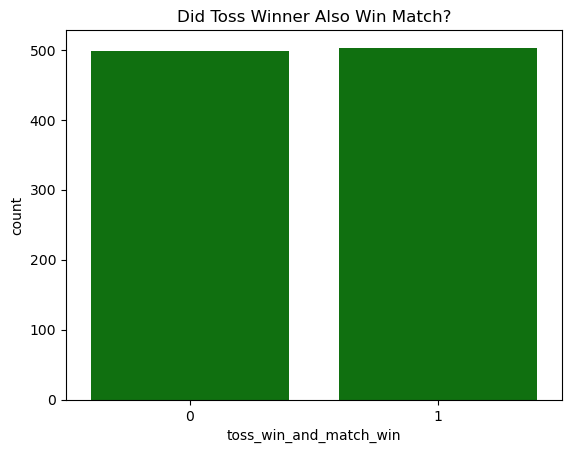

In [95]:
#Toss Impact
df['toss_winner'] = df['toss_winner'].str.strip().str.lower()
df['match_winner'] = df['winner'].str.strip().str.lower()

df['toss_win_and_match_win'] = (df['toss_winner'] == df['match_winner']).astype(int)

print("Win after winning toss:", df['toss_win_and_match_win'].mean()*100, "%")
sns.countplot(x='toss_win_and_match_win', data=df,color='green')
plt.title("Did Toss Winner Also Win Match?")
plt.show()

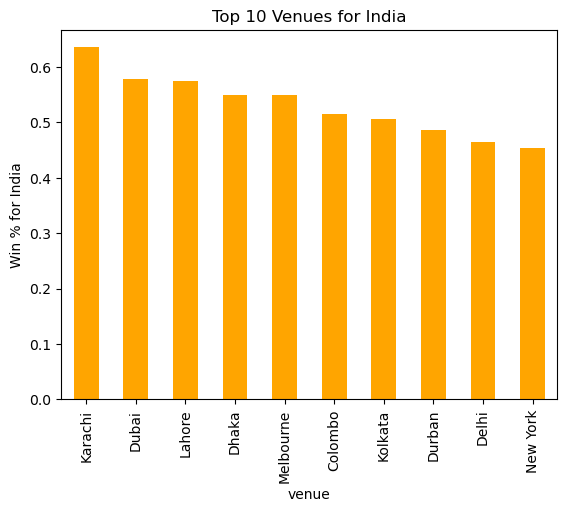

In [93]:
#Venue Analysis
venue_perf=df.groupby('venue')['winner_is_india'].mean().sort_values(ascending=False).head(10)
venue_perf.plot(kind='bar',color='orange')
plt.title("Top 10 Venues for India")
plt.ylabel("Win % for India")
plt.show()

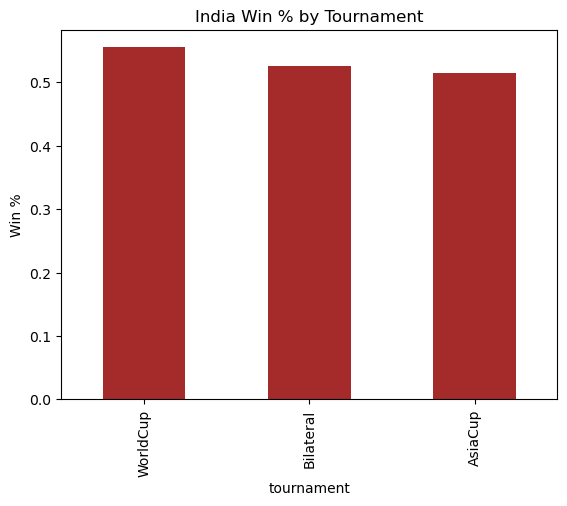

In [97]:
tournament_perf = df.groupby('tournament')['winner_is_india'].mean().sort_values(ascending=False)
tournament_perf.plot(kind='bar', color='Brown')
plt.title("India Win % by Tournament")
plt.ylabel("Win %")
plt.show()